### Data Classification

In [95]:
#scikit-learn 0.24.1 version
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn
import string
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import NearestNeighbors
#from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier


import sklearn.gaussian_process.kernels as kernels

#from sklearn.cross_validation import ShuffleSplit
from sklearn.model_selection import ShuffleSplit
#from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from scipy.stats import expon

In [96]:
payloads = pd.read_csv("data/payloads.csv",index_col='index')
display(payloads.head(30))

,payload,is_malicious,injection_type
index,,,
0,37662577P,0,LEGAL
1,shirting,0,LEGAL
2,&kw=%27;alert%28%27XSS%27%29;//,1,XSS
3,obeying,0,LEGAL
4,dictating,0,LEGAL
5,lafleur,0,LEGAL
6,capturers,0,LEGAL
7,8nca58z48,0,LEGAL
8,autocratic,0,LEGAL


In [97]:
def create_feature_length(payloads):
    '''
        Feature describing the lengh of the input
    '''
    
    
    payloads['length'] = [len(str(row)) for row in payloads['payload']]
    return payloads


payloads = create_feature_length(payloads)
display(payloads.head(30))


,payload,is_malicious,injection_type,length
index,,,,
0,37662577P,0,LEGAL,9
1,shirting,0,LEGAL,8
2,&kw=%27;alert%28%27XSS%27%29;//,1,XSS,31
3,obeying,0,LEGAL,7
4,dictating,0,LEGAL,9
5,lafleur,0,LEGAL,7
6,capturers,0,LEGAL,9
7,8nca58z48,0,LEGAL,9
8,autocratic,0,LEGAL,10


In [98]:
def create_feature_non_printable_characters(payloads):  
    '''
    Feature
    Number of non printable characthers within payload
    '''
    
    payloads['non-printable'] = [ len([1 for letter in str(row) if letter not in string.printable]) for row in payloads['payload']]
    return payloads
    

create_feature_non_printable_characters(payloads)
display(payloads.head(30))

,payload,is_malicious,injection_type,length,non-printable
index,,,,,
0,37662577P,0,LEGAL,9,0
1,shirting,0,LEGAL,8,0
2,&kw=%27;alert%28%27XSS%27%29;//,1,XSS,31,0
3,obeying,0,LEGAL,7,0
4,dictating,0,LEGAL,9,0
5,lafleur,0,LEGAL,7,0
6,capturers,0,LEGAL,9,0
7,8nca58z48,0,LEGAL,9,0
8,autocratic,0,LEGAL,10,0


In [99]:
def create_feature_punctuation_characters(payloads):
    '''
    Feature
    Number of punctuation characthers within payload
    '''
    
    payloads['punctuation'] = [ len([1 for letter in str(row) if letter in string.punctuation]) for row in payloads['payload']]
    return payloads
    

create_feature_punctuation_characters(payloads)
display(payloads.head(30))

,payload,is_malicious,injection_type,length,non-printable,punctuation
index,,,,,,
0,37662577P,0,LEGAL,9,0,0
1,shirting,0,LEGAL,8,0,0
2,&kw=%27;alert%28%27XSS%27%29;//,1,XSS,31,0,11
3,obeying,0,LEGAL,7,0,0
4,dictating,0,LEGAL,9,0,0
5,lafleur,0,LEGAL,7,0,0
6,capturers,0,LEGAL,9,0,0
7,8nca58z48,0,LEGAL,9,0,0
8,autocratic,0,LEGAL,10,0,0


In [100]:
def create_feature_min_byte_value(payloads):
    '''
    Feature
    Minimum byte value in payload
    '''
    
    payloads['min-byte'] = [ min(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_min_byte_value(payloads)
display(payloads.head(30))

,payload,is_malicious,injection_type,length,non-printable,punctuation,min-byte
index,,,,,,,
0,37662577P,0,LEGAL,9,0,0,50
1,shirting,0,LEGAL,8,0,0,103
2,&kw=%27;alert%28%27XSS%27%29;//,1,XSS,31,0,11,37
3,obeying,0,LEGAL,7,0,0,98
4,dictating,0,LEGAL,9,0,0,97
5,lafleur,0,LEGAL,7,0,0,97
6,capturers,0,LEGAL,9,0,0,97
7,8nca58z48,0,LEGAL,9,0,0,52
8,autocratic,0,LEGAL,10,0,0,97


In [101]:
def create_feature_max_byte_value(payloads):
    '''
    Feature
    Maximum byte value in payload
    '''
    
    payloads['max-byte'] = [ max(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_max_byte_value(payloads)
display(payloads.head(30))

,payload,is_malicious,injection_type,length,non-printable,punctuation,min-byte,max-byte
index,,,,,,,,
0,37662577P,0,LEGAL,9,0,0,50,80
1,shirting,0,LEGAL,8,0,0,103,116
2,&kw=%27;alert%28%27XSS%27%29;//,1,XSS,31,0,11,37,119
3,obeying,0,LEGAL,7,0,0,98,121
4,dictating,0,LEGAL,9,0,0,97,116
5,lafleur,0,LEGAL,7,0,0,97,117
6,capturers,0,LEGAL,9,0,0,97,117
7,8nca58z48,0,LEGAL,9,0,0,52,122
8,autocratic,0,LEGAL,10,0,0,97,117


In [102]:
def create_feature_mean_byte_value(payloads):
    '''
    Feature
    Maximum byte value in payload
    '''
    
    payloads['mean-byte'] = [ np.mean(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_mean_byte_value(payloads)
display(payloads.head(30))

,payload,is_malicious,injection_type,length,non-printable,punctuation,min-byte,max-byte,mean-byte
index,,,,,,,,,
0,37662577P,0,LEGAL,9,0,0,50,80,56.333333
1,shirting,0,LEGAL,8,0,0,103,116,109.000000
2,&kw=%27;alert%28%27XSS%27%29;//,1,XSS,31,0,11,37,119,65.806452
3,obeying,0,LEGAL,7,0,0,98,121,107.000000
4,dictating,0,LEGAL,9,0,0,97,116,105.666667
5,lafleur,0,LEGAL,7,0,0,97,117,106.714286
6,capturers,0,LEGAL,9,0,0,97,117,109.444444
7,8nca58z48,0,LEGAL,9,0,0,52,122,77.888889
8,autocratic,0,LEGAL,10,0,0,97,117,107.100000


In [103]:
def create_feature_std_byte_value(payloads):
    '''
    Feature
    Standard deviation byte value in payload
    '''
    
    payloads['std-byte'] = [ np.std(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_std_byte_value(payloads)
display(payloads.head(30))

,payload,is_malicious,injection_type,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte
index,,,,,,,,,,
0,37662577P,0,LEGAL,9,0,0,50,80,56.333333,8.537499
1,shirting,0,LEGAL,8,0,0,103,116,109.000000,5.049752
2,&kw=%27;alert%28%27XSS%27%29;//,1,XSS,31,0,11,37,119,65.806452,26.617263
3,obeying,0,LEGAL,7,0,0,98,121,107.000000,7.151423
4,dictating,0,LEGAL,9,0,0,97,116,105.666667,6.599663
5,lafleur,0,LEGAL,7,0,0,97,117,106.714286,6.670067
6,capturers,0,LEGAL,9,0,0,97,117,109.444444,7.558823
7,8nca58z48,0,LEGAL,9,0,0,52,122,77.888889,26.904954
8,autocratic,0,LEGAL,10,0,0,97,117,107.100000,8.117266


In [104]:
def create_feature_distinct_bytes(payloads):
    '''
    Feature
    Number of distinct bytes in payload
    '''
    
    payloads['distinct-bytes'] = [ len(list(set(bytearray(str(row), 'utf8')))) for row in payloads['payload']]
    return payloads

create_feature_distinct_bytes(payloads)
display(payloads.head(30))

,payload,is_malicious,injection_type,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-bytes
index,,,,,,,,,,,
0,37662577P,0,LEGAL,9,0,0,50,80,56.333333,8.537499,6
1,shirting,0,LEGAL,8,0,0,103,116,109.000000,5.049752,7
2,&kw=%27;alert%28%27XSS%27%29;//,1,XSS,31,0,11,37,119,65.806452,26.617263,18
3,obeying,0,LEGAL,7,0,0,98,121,107.000000,7.151423,7
4,dictating,0,LEGAL,9,0,0,97,116,105.666667,6.599663,7
5,lafleur,0,LEGAL,7,0,0,97,117,106.714286,6.670067,6
6,capturers,0,LEGAL,9,0,0,97,117,109.444444,7.558823,8
7,8nca58z48,0,LEGAL,9,0,0,52,122,77.888889,26.904954,7
8,autocratic,0,LEGAL,10,0,0,97,117,107.100000,8.117266,7


In [105]:
sql_keywords = pd.read_csv('data/SQLKeywords.txt', index_col=False)

def create_feature_sql_keywords(payloads):
    
    '''
    Feature
    Number of SQL keywords within payload
    '''
    payloads['sql-keywords'] = [ len([1 for keyword in sql_keywords['Keyword'] if str(keyword).lower() in str(row).lower()]) for row in payloads['payload']]
    return payloads

create_feature_sql_keywords(payloads)
display(type(sql_keywords))
display(payloads.head(30))

pandas.core.frame.DataFrame

,payload,is_malicious,injection_type,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-bytes,sql-keywords
index,,,,,,,,,,,,
0,37662577P,0,LEGAL,9,0,0,50,80,56.333333,8.537499,6,0
1,shirting,0,LEGAL,8,0,0,103,116,109.000000,5.049752,7,0
2,&kw=%27;alert%28%27XSS%27%29;//,1,XSS,31,0,11,37,119,65.806452,26.617263,18,0
3,obeying,0,LEGAL,7,0,0,98,121,107.000000,7.151423,7,0
4,dictating,0,LEGAL,9,0,0,97,116,105.666667,6.599663,7,0
5,lafleur,0,LEGAL,7,0,0,97,117,106.714286,6.670067,6,0
6,capturers,0,LEGAL,9,0,0,97,117,109.444444,7.558823,8,0
7,8nca58z48,0,LEGAL,9,0,0,52,122,77.888889,26.904954,7,0
8,autocratic,0,LEGAL,10,0,0,97,117,107.100000,8.117266,7,0


In [106]:
js_keywords = pd.read_csv('data/JavascriptKeywords.txt', index_col=False)

def create_feature_javascript_keywords(payloads):
    '''
    Feature
    Number of Javascript keywords within payload
    '''
    
    payloads['js-keywords'] = [len([1 for keyword in js_keywords['Keyword'] if str(keyword).lower() in str(row).lower()]) for row in payloads['payload']]
    return payloads
    

create_feature_javascript_keywords(payloads)
display(payloads.head(30))  

,payload,is_malicious,injection_type,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-bytes,sql-keywords,js-keywords
index,,,,,,,,,,,,,
0,37662577P,0,LEGAL,9,0,0,50,80,56.333333,8.537499,6,0,0
1,shirting,0,LEGAL,8,0,0,103,116,109.000000,5.049752,7,0,1
2,&kw=%27;alert%28%27XSS%27%29;//,1,XSS,31,0,11,37,119,65.806452,26.617263,18,0,1
3,obeying,0,LEGAL,7,0,0,98,121,107.000000,7.151423,7,0,1
4,dictating,0,LEGAL,9,0,0,97,116,105.666667,6.599663,7,0,1
5,lafleur,0,LEGAL,7,0,0,97,117,106.714286,6.670067,6,0,0
6,capturers,0,LEGAL,9,0,0,97,117,109.444444,7.558823,8,0,0
7,8nca58z48,0,LEGAL,9,0,0,52,122,77.888889,26.904954,7,0,0
8,autocratic,0,LEGAL,10,0,0,97,117,107.100000,8.117266,7,0,0


In [82]:
def create_features(payloads):

    features = create_feature_length(payloads)
    features = create_feature_non_printable_characters(features)
    features = create_feature_punctuation_characters(features)
    features = create_feature_max_byte_value(features)
    features = create_feature_min_byte_value(features)
    features = create_feature_mean_byte_value(features)
    features = create_feature_std_byte_value(features)
    features = create_feature_distinct_bytes(features)
    features = create_feature_sql_keywords(features)
    features = create_feature_javascript_keywords(features)
    del features['payload']

    return features


In [109]:
payloads = pd.read_csv("data/payloads.csv",index_col='index')
features = create_features(payloads)
features.to_csv("data/payloads_Features.csv", index=False)

### Scoring custom features

Score the custom features using the SelectKBest function

In [83]:
payloadsForTrain = pd.read_csv("data/payloads.csv")
Y = payloadsForTrain['is_malicious']
X = create_features(pd.DataFrame(payloadsForTrain['payload'].copy()))

test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X, Y)
# summarize scores
print(fit.scores_)


[1814217.66371389    5095.67626609 1282154.55944392    8858.68033433
  207587.5761351    17169.54003051  191994.82158198  291900.73776364
   33399.39159728   49275.50711339]


In [84]:
features = fit.transform(X)
# summarize selected features
# summarize scores
np.set_printoptions(precision=2)
print(fit.scores_)

[1814217.66    5095.68 1282154.56    8858.68  207587.58   17169.54
  191994.82  291900.74   33399.39   49275.51]


In [85]:
# Get the indices sorted by most important to least important
indices = np.argsort(fit.scores_)

# To get top 10 feature names
featuress = []
featuresss = []
for i in range(10):
    featuress.append(X.columns[indices[i]])

#display(featuress)
#display([featuress[j] + ' ' + str(fit.scores_[j]) for j in indices[range(10)]])
    
for i in range(9,-1,-1):
    featuresss.append(X.columns[indices[i]])
    
display(featuresss)

['length',
 'punctuation',
 'distinct-bytes',
 'min-byte',
 'std-byte',
 'js-keywords',
 'sql-keywords',
 'mean-byte',
 'max-byte',
 'non-printable']

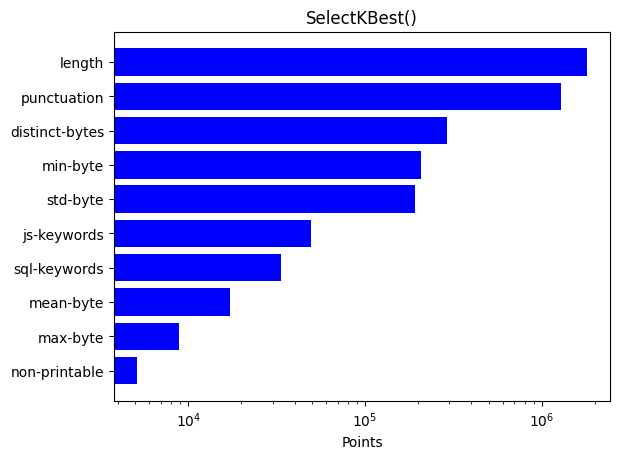

In [86]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(featuress))
performance = 3 + 10 * np.random.rand(len(featuress))
error = np.random.rand(len(featuress))

ax.barh(y_pos, fit.scores_[indices[range(10)]],  align='center',
        color='blue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(featuress)
ax.set_xscale('log')

#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Points')
ax.set_title('SelectKBest()')

plt.show()

### Model selection and evaluation

hyperparameter tuning and out of sample testing using train_model

In [90]:
def train_model(clf, param_grid, X, Y):
    '''Trains and evaluates the model clf from input
    
    The function selects the best model of clf by optimizing for the validation data,
    then evaluates its performance using the out of sample test data.
    
    input - clf: the model to train
            param_grid: a dict of hyperparameters to use for optimization
            X: features
            Y: labels
    
    output - the best estimator (trained model)
             the confusion matrix from classifying the test data
    '''
    
    #First, partition into train and test data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    #n_iter = 5
    #If number of possible iterations(np.prod) are less than prefered number of iterations(n_iter),
    #set it to the number of possible iterations
    #number of possible iterations are not less than prefered number of iterations if any argument is expon()
    #because expon() is continous (writing 100 instead, could be any large number)
    #n_iter = min(n_iter,np.prod([
    #    100 if type(xs) == type(expon()) 
    #    else len(xs) 
    #    for xs in param_grid.values()
    #]))
    
    # scikit-learn 0.24.1 version
    # n_iter is replaced with n_splits
    n_splits = 5
    
    n_splits = min(n_splits,np.prod([
        100 if type(xs) == type(expon()) 
        else len(xs) 
        for xs in param_grid.values()
    ]))
    
    #perform a grid search for the best parameters on the training data.
    #Cross validation is made to select the parameters, so the training data is actually split into
    #a new train data set and a validation data set, K number of times
    
    #cv = ShuffleSplit(n=len(X_train), n_iter=5, test_size=0.2, random_state=0) #DEBUG: n_iter=10
    
    # scikit-learn 0.24.1 version
    cv = ShuffleSplit(train_size=0.5, test_size=0.2, n_splits=5, random_state=0)
    
    #cv = KFold(n=len(X), n_folds=10)
    #random_grid_search = RandomizedSearchCV(
    #    clf, 
    #    param_distributions=param_grid,
    #    cv=cv, 
    #    scoring='f1', 
    #    n_iter=n_iter, #DEBUG 1 
    #    random_state=5,
    #    refit=True,
    #    verbose=10
    #)
    
    # scikit-learn 0.24.1 version
    random_grid_search = RandomizedSearchCV(
        clf, 
        param_distributions=param_grid,
        cv=cv, 
        scoring='f1', 
        n_iter=n_splits, #DEBUG 1 
        random_state=5,
        refit=True,
        verbose=10
    )
    
    '''Randomized search used instead. We have limited computing power
    grid_search = GridSearchCV(
        clf,
        param_grid=param_grid,
        cv=cv,
        scoring='f1', #accuracy/f1/f1_weighted all give same result?
        verbose=10,
        n_jobs=-1
    )
    grid_search.fit(X_train, Y_train)
    '''
    random_grid_search.fit(X_train, Y_train)
    
    #Evaluate the best model on the test data
    Y_test_predicted = random_grid_search.best_estimator_.predict(X_test)
    Y_test_predicted_prob = random_grid_search.best_estimator_.predict_proba(X_test)[:, 1]

    confusion = confusion_matrix(Y_test, Y_test_predicted)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    #Calculate recall (sensitivity) from confusion matrix
    sensitivity = TP / float(TP + FN)
    
    #Calculate specificity from confusion matrix
    specificity = TN / float(TN + FP)

    #Calculate accuracy
    accuracy = (confusion[0][0] + confusion[1][1]) / (confusion.sum().sum())
    
    #Calculate axes of ROC curve
    fpr, tpr, thresholds = roc_curve(Y_test, Y_test_predicted_prob)
    
    #Area under the ROC curve
    auc = roc_auc_score(Y_test, Y_test_predicted_prob)

    return {
        'conf_matrix':confusion, 
        'accuracy':accuracy, 
        'sensitivity':sensitivity,
        'specificity':specificity,
        'auc':auc,
        'params':random_grid_search.best_params_,
        'model':random_grid_search.best_estimator_,
        'roc':{'fpr':fpr,'tpr':tpr,'thresholds':thresholds}
    }


Classifiers tested using custom feature space:
 - AdaBoost
 - SGD classifier 
 - MultiLayerPerceptron classifier
 - Logistic Regression
 - Support Vector Machine
 - Random forest
 - Decision Tree
 - Multinomial Naive Bayes


In [91]:
def create_classifier_inputs(subscript):
    
    classifier_inputs = {}
    
    
    '''classifier_inputs[subscript + ' GPC'] = {
        'pipeline':GaussianProcessClassifier(),
        'dict_params': {
            'kernel':[
                1.0*kernels.RBF(1.0),
                1.0*kernels.Matern(),
                1.0*kernels.RationalQuadratic(),
                1.0*kernels.DotProduct()
            ]
        }
    }'''
    classifier_inputs[subscript + ' AdaBoostClassifier'] = {
        'pipeline':AdaBoostClassifier(n_estimators=100),
        'dict_params': {
            'n_estimators':[10,20,50, 100], 
            'learning_rate':[0.1, 0.5, 1.0, 2.0]
        }
    }
    classifier_inputs[subscript + ' SGD'] = {
        'pipeline':SGDClassifier(loss="log", penalty="l2"),
        'dict_params': {
            'learning_rate': ['optimal']
        }
    }
    classifier_inputs[subscript + ' RandomForest'] = {
        'pipeline':RandomForestClassifier(
            max_depth=None,min_samples_split=2, random_state=0),
        'dict_params': {
            'n_estimators':[10,20,40,60]
        }
    }
    classifier_inputs[subscript + ' DecisionTree'] = {
        'pipeline':  DecisionTreeClassifier(max_depth=5),
        'dict_params': {
            'min_samples_split': [2]
        }
    }
    '''classifier_inputs[subscript + ' MLPClassifier'] = {
        'pipeline':MLPClassifier(
            activation='relu',
            solver='adam',
            early_stopping=False,
            verbose=True
            
        ),
        'dict_params': {
            'hidden_layer_sizes':[(300, 200, 150, 150), (30, 30, 30), (150, 30, 30, 150), 
                                  (400, 250, 100, 100) , (150, 200, 300)],
            'alpha':[0.0005,0.001,0.01,0.1,1],
            'learning_rate':['constant','invscaling'],
            'learning_rate_init':[0.0005,0.001,0.01,0.1,1],
            'momentum':[0,0.9],
        }
    }'''
    classifier_inputs[subscript + ' Logistic'] = {
        'pipeline':LogisticRegression(),
        'dict_params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    }
    classifier_inputs[subscript + ' MultinomialNB'] = {
        'pipeline':MultinomialNB(),
        'dict_params': {
            'alpha': [1.0]
        }
    }
    
    '''classifier_inputs[subscript + ' SVM'] = {
        'pipeline':SVC(probability=True),
        'dict_params': {
            'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'gamma':[0.001, 0.0001,'auto'],
            'kernel':['rbf']
        }
    }'''
    return classifier_inputs
    

In [92]:
payloadsForTrain = pd.read_csv("data/payloads.csv")

classifier_inputs_custom = {}

#Get classifiers and parameters to optimize
classifier_inputs_custom.update(create_classifier_inputs('custom'))

#Extract payloads and labels
Y = payloadsForTrain['is_malicious']
X = create_features(pd.DataFrame(payloadsForTrain['payload'].copy()))

#Select the best features
X_new = SelectKBest(score_func=chi2, k=4).fit_transform(X,Y)

#Call train_model for every classifier and save results to classifier_results
for classifier_name, inputs in classifier_inputs_custom.items():
    if classifier_name in classifier_results.index.values.tolist():
        print('Skipping ' + classifier_name + ', already trained')
    else:
        result_dict = train_model(inputs['pipeline'],inputs['dict_params'],X,Y)
        classifier_results.loc[classifier_name] = result_dict

display(classifier_results)

#pickle.dump( classifier_results, open( "data/trained_classifiers_custom_all_features.p", "wb" ) )

Skipping custom AdaBoostClassifier, already trained
Skipping custom SGD, already trained
Skipping custom RandomForest, already trained
Skipping custom DecisionTree, already trained
Skipping custom Logistic, already trained
Skipping custom MultinomialNB, already trained


,accuracy,sensitivity,specificity,auc,conf_matrix,params,model,roc
custom AdaBoostClassifier,0.989026,0.908299,0.996866,0.997166,"[[20038, 63], [179, 1773]]","{'n_estimators': 100, 'learning_rate': 0.5}","(DecisionTreeClassifier(max_depth=1, random_st...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
custom SGD,0.981771,0.819672,0.997513,0.988085,"[[20051, 50], [352, 1600]]",{'learning_rate': 'optimal'},SGDClassifier(loss='log'),"{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
custom RandomForest,0.997098,0.982582,0.998508,0.999001,"[[20071, 30], [34, 1918]]",{'n_estimators': 60},"(DecisionTreeClassifier(max_features='auto', r...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
custom DecisionTree,0.987711,0.906250,0.995622,0.981595,"[[20013, 88], [183, 1769]]",{'min_samples_split': 2},DecisionTreeClassifier(max_depth=5),"{'fpr': [0.0, 0.0, 0.0, 4.974876871797423e-05,..."
custom Logistic,0.981680,0.845287,0.994926,0.986795,"[[19999, 102], [302, 1650]]",{'C': 0.1},LogisticRegression(C=0.1),"{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
custom MultinomialNB,0.925226,0.924693,0.925277,0.973558,"[[18599, 1502], [147, 1805]]",{'alpha': 1.0},MultinomialNB(),"{'fpr': [0.0, 0.02880453708770708, 0.028804537..."


In [93]:
#Save classifiers in a pickle file to be able to re-use them without re-training
pickle.dump( classifier_results, open( "data/trained_classifiers.p", "wb" ) )

### Classifier results

In [94]:
classifier_results = pickle.load( open( "data/trained_classifiers.p", "rb" ) )
display(classifier_results)

,accuracy,sensitivity,specificity,auc,conf_matrix,params,model,roc
custom AdaBoostClassifier,0.989026,0.908299,0.996866,0.997166,"[[20038, 63], [179, 1773]]","{'n_estimators': 100, 'learning_rate': 0.5}","(DecisionTreeClassifier(max_depth=1, random_st...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
custom SGD,0.981771,0.819672,0.997513,0.988085,"[[20051, 50], [352, 1600]]",{'learning_rate': 'optimal'},SGDClassifier(loss='log'),"{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
custom RandomForest,0.997098,0.982582,0.998508,0.999001,"[[20071, 30], [34, 1918]]",{'n_estimators': 60},"(DecisionTreeClassifier(max_features='auto', r...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
custom DecisionTree,0.987711,0.906250,0.995622,0.981595,"[[20013, 88], [183, 1769]]",{'min_samples_split': 2},DecisionTreeClassifier(max_depth=5),"{'fpr': [0.0, 0.0, 0.0, 4.974876871797423e-05,..."
custom Logistic,0.981680,0.845287,0.994926,0.986795,"[[19999, 102], [302, 1650]]",{'C': 0.1},LogisticRegression(C=0.1),"{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
custom MultinomialNB,0.925226,0.924693,0.925277,0.973558,"[[18599, 1502], [147, 1805]]",{'alpha': 1.0},MultinomialNB(),"{'fpr': [0.0, 0.02880453708770708, 0.028804537..."


### F1-score
Calculate F1-score of each classifier and add to classifiers table


In [110]:
def f1_score(conf_matrix):
    precision = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1] )
    recall = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[1][0] )
    
    return (2 * precision * recall) / (precision + recall)

#load classifier table if not yet loaded
classifier_results = pickle.load( open( "data/trained_classifiers.p", "rb" ) )

#Calculate F1-scores
classifier_results['F1-score'] = [ f1_score(conf_matrix) for conf_matrix in classifier_results['conf_matrix']]

#Re-arrange columns
classifier_results = classifier_results[['F1-score','accuracy','sensitivity','specificity','auc','conf_matrix','params','model','roc']]

#re-sort on F1-score
classifier_results = classifier_results.sort_values(['F1-score','accuracy'], ascending=[False,False])

display(classifier_results)

,F1-score,accuracy,sensitivity,specificity,auc,conf_matrix,params,model,roc
custom RandomForest,0.998408,0.997098,0.982582,0.998508,0.999001,"[[20071, 30], [34, 1918]]",{'n_estimators': 60},"(DecisionTreeClassifier(max_features='auto', r...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
custom AdaBoostClassifier,0.993998,0.989026,0.908299,0.996866,0.997166,"[[20038, 63], [179, 1773]]","{'n_estimators': 100, 'learning_rate': 0.5}","(DecisionTreeClassifier(max_depth=1, random_st...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
custom DecisionTree,0.993275,0.987711,0.906250,0.995622,0.981595,"[[20013, 88], [183, 1769]]",{'min_samples_split': 2},DecisionTreeClassifier(max_depth=5),"{'fpr': [0.0, 0.0, 0.0, 4.974876871797423e-05,..."
custom SGD,0.990075,0.981771,0.819672,0.997513,0.988085,"[[20051, 50], [352, 1600]]",{'learning_rate': 'optimal'},SGDClassifier(loss='log'),"{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
custom Logistic,0.990000,0.981680,0.845287,0.994926,0.986795,"[[19999, 102], [302, 1650]]",{'C': 0.1},LogisticRegression(C=0.1),"{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
custom MultinomialNB,0.957551,0.925226,0.924693,0.925277,0.973558,"[[18599, 1502], [147, 1805]]",{'alpha': 1.0},MultinomialNB(),"{'fpr': [0.0, 0.02880453708770708, 0.028804537..."


Final formating  
Convert numeric columns to float  
Round numeric columns to 4 decimals  

In [111]:
classifier_results[['F1-score','accuracy','sensitivity','specificity','auc']] = classifier_results[['F1-score','accuracy','sensitivity','specificity','auc']].apply(pd.to_numeric)
classifier_results = classifier_results.round({'F1-score':4,'accuracy':4,'sensitivity':4,'specificity':4,'auc':4})
#classifier_results[['F1-score','accuracy','sensitivity','specificity','auc','conf_matrix','params']].to_csv('data/classifiers_result_table.csv')
display(classifier_results.dtypes)

F1-score       float64
accuracy       float64
sensitivity    float64
specificity    float64
auc            float64
conf_matrix     object
params          object
model           object
roc             object
dtype: object

### Export classifiers
First, export full list of trained classifiers for later use
Second, pick one classifier to save in a separate pickle, used later to implement in a dummy server

In [112]:
#save complete list of classifiers to 'trained_classifiers'
pickle.dump( classifier_results, open( "data/trained_classifiers.p", "wb" ) )

### N-gram

The type of N-gram function determines how the actual "words" should be created from the payload string

In [ ]:
def get1Grams(payload_obj):
    '''Divides a string into 1-grams
    
    Example: input - payload: "<script>"
             output- ["<","s","c","r","i","p","t",">"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-1):
        ngrams.append(payload[i:i+1])
    return ngrams

tfidf_vectorizer_1grams = TfidfVectorizer(tokenizer=get1Grams)
count_vectorizer_1grams = CountVectorizer(min_df=1, tokenizer=get1Grams)

In [ ]:
def get2Grams(payload_obj):
    '''Divides a string into 2-grams
    
    Example: input - payload: "<script>"
             output- ["<s","sc","cr","ri","ip","pt","t>"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-2):
        ngrams.append(payload[i:i+2])
    return ngrams

tfidf_vectorizer_2grams = TfidfVectorizer(tokenizer=get2Grams)
count_vectorizer_2grams = CountVectorizer(min_df=1, tokenizer=get2Grams)

In [ ]:
def get3Grams(payload_obj):
    '''Divides a string into 3-grams
    
    Example: input - payload: "<script>"
             output- ["<sc","scr","cri","rip","ipt","pt>"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-3):
        ngrams.append(payload[i:i+3])
    return ngrams

tfidf_vectorizer_3grams = TfidfVectorizer(tokenizer=get3Grams)
count_vectorizer_3grams = CountVectorizer(min_df=1, tokenizer=get3Grams)

In [64]:
def create_classifier_inputs_using_vectorizers(vectorizer, subscript):
    '''make pipelines of the specified vectorizer with the classifiers to train
    
    input - vectorizer: the vectorizer to add to the pipelines
            subscript:  subscript name for the dictionary key
            
    output - A dict of inputs to use for train_model(); a pipeline and a dict of params to optimize
    '''
    
    classifier_inputs = {}
    
    classifier_inputs[subscript + ' MLPClassifier'] = {
        'pipeline':Pipeline([('vect', vectorizer),('clf',MLPClassifier(
            activation='relu',
            solver='adam',
            early_stopping=False,
            verbose=True
            
        ))]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40],
            'clf__hidden_layer_sizes':[(500,250,125,62)],
            'clf__alpha':[0.0005,0.001,0.01,0.1,1],
            'clf__learning_rate':['constant','invscaling'],
            'clf__learning_rate_init':[0.001,0.01,0.1,1],
            'clf__momentum':[0,0.9],
        }
    }
    '''
    classifier_inputs[subscript + ' MultinomialNB'] = {
        'pipeline':Pipeline([('vect', vectorizer),('clf',MultinomialNB())]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40]
        }
    }
    classifier_inputs[subscript + ' RandomForest'] = {
        'pipeline':Pipeline([('vect', vectorizer),('clf',RandomForestClassifier(
            max_depth=None,min_samples_split=2, random_state=0))]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40],
            'clf__n_estimators':[10,20,40,60]
        }
    }
    classifier_inputs[subscript + ' Logistic'] = {
        'pipeline':Pipeline([('vect', vectorizer), ('clf',LogisticRegression())]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40],
            'clf__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    }
    classifier_inputs[subscript + ' SVM'] = {
        'pipeline':Pipeline([('vect', vectorizer), ('clf',SVC(probability=True))]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40],
            'clf__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'clf__gamma':[0.001, 0.0001,'auto'],
            'clf__kernel':['rbf']
        }
    }
    '''
    
    return classifier_inputs


In [65]:
classifier_results = pd.DataFrame(columns=['accuracy',
                                           'sensitivity',
                                           'specificity',
                                           'auc',
                                           'conf_matrix',
                                           'params',
                                           'model',
                                           'roc'])#,index=classifier_inputs.keys())

In [ ]:
classifier_inputs = {}
classifier_inputs.update(create_classifier_inputs_using_vectorizers(count_vectorizer_1grams,'count 1grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(count_vectorizer_2grams,'count 2grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(count_vectorizer_3grams,'count 3grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(tfidf_vectorizer_1grams,'tfidf 1grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(tfidf_vectorizer_2grams,'tfidf 2grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(tfidf_vectorizer_3grams,'tfidf 3grams'))

payloadsForTrain = pd.read_csv("data/payloads.csv")
X = payloadsForTrain['payload'] 
Y = payloadsForTrain['is_malicious']

for classifier_name, inputs in classifier_inputs.items():
    #display(inputs['dict_params'])
    if classifier_name in classifier_results.index.values.tolist():
        print('Skipping ' + classifier_name + ', already trained')
    else:
        result_dict = train_model(inputs['pipeline'],inputs['dict_params'],X,Y)
        classifier_results.loc[classifier_name] = result_dict

#display(classifier_results)